# 도시데이터 수집에 용이한 센서 위치

과제의 목표는 

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np

### 도시 경계

In [4]:
ad_boundary = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/administrative boundary(town).geojson')
s_boundary_c = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/statutory boundary(city).geojson')
s_boundary_t = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/statutory boundary(town).geojson')
street = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/streetname_street.geojson')
c_chart = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/cadastral chart.geojson')

In [10]:
# 행정경계(읍면동)

# ADM_DR_CD = 읍면동코드
# ADM_DR_NM = 읍면동명 

ad_boundary

,ADM_DR_CD,ADM_DR_NM,geometry
0,3104151,안양1동,"MULTIPOLYGON (((126.92439 37.40367, 126.92451 ..."
1,3104152,안양2동,"MULTIPOLYGON (((126.91974 37.41752, 126.91975 ..."
2,3104153,안양3동,"MULTIPOLYGON (((126.91812 37.40262, 126.91843 ..."
3,3104154,안양4동,"MULTIPOLYGON (((126.92319 37.39639, 126.92290 ..."
4,3104155,안양5동,"MULTIPOLYGON (((126.92395 37.39576, 126.92457 ..."
5,3104156,안양6동,"MULTIPOLYGON (((126.93325 37.39073, 126.93353 ..."
6,3104157,안양7동,"MULTIPOLYGON (((126.94082 37.39217, 126.94101 ..."
7,3104158,안양8동,"MULTIPOLYGON (((126.93366 37.38380, 126.93380 ..."
8,3104159,안양9동,"MULTIPOLYGON (((126.91111 37.39484, 126.91125 ..."
9,3104160,석수1동,"MULTIPOLYGON (((126.93445 37.44326, 126.93456 ..."


In [9]:
ad_boundary.drop('geometry', axis=1).describe(include='all')  #geometry 칼럼이 있다면 value_counts가 되지 않기 때문에 빼고 확인한다.

,ADM_DR_CD,ADM_DR_NM
count,31,31
unique,31,31
top,3104160,안양5동
freq,1,1


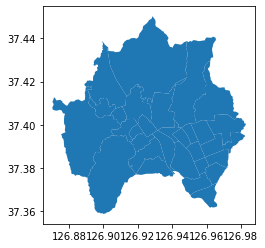

In [11]:
ad_boundary.plot()

In [12]:
# 법정경계(시군구)

# SIG_CD 시군구코드
# SIG_KOR_NM 시군구명

s_boundary_c

,SIG_CD,SIG_KOR_NM,geometry
0,41171,안양시만안구,"MULTIPOLYGON (((126.93445 37.44326, 126.93456 ..."
1,41173,안양시동안구,"MULTIPOLYGON (((126.96384 37.44077, 126.96540 ..."


In [13]:
s_boundary_c.drop('geometry', axis=1).describe(include='all')  #geometry 칼럼이 있다면 value_counts가 되지 않기 때문에 빼고 확인한다.

,SIG_CD,SIG_KOR_NM
count,2,2
unique,2,2
top,41171,안양시만안구
freq,1,1


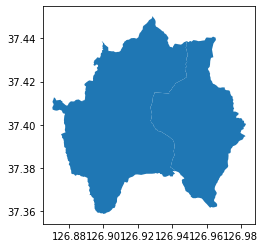

In [14]:
s_boundary_c.plot()

In [15]:
# 법정경계(읍면동)

# EMD_CD 읍면동코드
# EMD_KOR_NM 읍면동명

s_boundary_t

,EMD_CD,EMD_KOR_NM,geometry
0,41171101,안양동,"MULTIPOLYGON (((126.94660 37.42111, 126.94183 ..."
1,41171102,석수동,"MULTIPOLYGON (((126.88977 37.41779, 126.88977 ..."
2,41171103,박달동,"MULTIPOLYGON (((126.89105 37.41777, 126.89117 ..."
3,41173101,비산동,"MULTIPOLYGON (((126.96384 37.44077, 126.96540 ..."
4,41173102,관양동,"MULTIPOLYGON (((126.96765 37.41718, 126.96807 ..."
5,41173103,평촌동,"MULTIPOLYGON (((126.97535 37.39672, 126.97578 ..."
6,41173104,호계동,"MULTIPOLYGON (((126.95621 37.39053, 126.96144 ..."


In [22]:
s_boundary_t.drop('geometry', axis=1).describe(include='all')  #geometry 칼럼이 있다면 value_counts가 되지 않기 때문에 빼고 확인한다.

,EMD_CD,EMD_KOR_NM
count,7,7
unique,7,7
top,41173103,관양동
freq,1,1


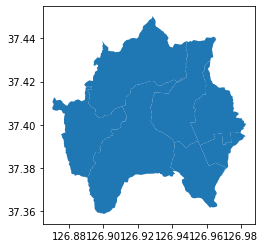

In [17]:
s_boundary_t.plot()

In [18]:
# 도로정보

# BSI_INT    해당 도로의 기초간격
# RBP_CN    해당 도로의 기점
# RDS_DPN_SE    해당 도로의 도로구간종속구분코드
# RDS_MAN_NO    해당 도로의 도로구간일련번호
# REP_CN    해당 도로의 종점
# RN    도로명
# RN_CD    도로명 코드
# ROAD_BT    해당 도로의 도로폭
# ROAD_LT    해당 도로의 도로길이
# ROA_CLS_SE    해당 도로의 도로위계기능구분코드
# WDR_RD_CD    해당 도로의 광역도로구분코드

street

,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,...,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry
0,20101228,국토해양부 노선명을 이용하여 명명함,2000,Seohaean Expressway,20141030,직권수정(속성변경),99,20101228,20160602111927,박달동 산 73-3,...,6991,석수동 352-2,서해안고속도로,1000007,40.000,340810.000,1,41171,1,"MULTILINESTRING ((126.87706 37.40315, 126.8770..."
1,20101228,국토해양부 노선명을 이용하여 명명함,2000,Seouloegwaksunhwan Expressway,20141030,직권수정(속성변경),99,20101228,20160602111323,안양동 산 78,...,6987,안양동 산81-3,서울외곽순환고속도로,1000027,50.000,128020.000,1,41171,1,"MULTILINESTRING ((126.89194 37.37079, 126.8919..."
2,20101228,국토해양부 노선명을 이용하여 명명함,2000,Je2gyeongin Expressway,20200515,도로구간변경,12,20190920,20200515111501,경기도 안양시 만안구 석수동 706-55도(26),...,6993,경기도 안양시 동안구 관양동 1785-7임(34),제2경인고속도로,1000036,50.000,46750.000,1,41171,1,"MULTILINESTRING ((126.89493 37.42381, 126.8949..."
3,20091210,"1번 국도의 일부로서, 수원시 의왕시 안양시를 잇는 광역도로로 1976년 11월 2...",20,Gyeongsu-daero,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20091210,20141030230835,석수동 산45-37임,...,596,석수동 174-40대,경수대로,2012008,4.000,27499.000,2,41171,2,"MULTILINESTRING ((126.91316 37.41712, 126.9129..."
4,20091210,"1번 국도의 일부로서, 수원시 의왕시 안양시를 잇는 광역도로로 1976년 11월 2...",20,Gyeongsu-daero,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20091210,20141030230835,안양동 18-20대,...,772,안양동 42-41대,경수대로,2012008,4.000,27499.000,2,41171,2,"MULTILINESTRING ((126.91876 37.41488, 126.9185..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,20130501,시민대로 기초번호에 따라 부여,20,Simin-daero 327beon-gil,20141030,직권수정(속성변경),99,20130501,20190516140530,관양동 1618,...,1766,관양동 766-1,시민대로327번길,4349275,11.900,636.321,4,41173,3,"MULTILINESTRING ((126.96665 37.39582, 126.9664..."
1433,20130501,시민대로 기초번호에 따라 부여,20,Simin-daero 327beon-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20130501,20141030230847,관양동 1618,...,1770,관양동 766-1,시민대로327번길,4349275,14.994,364.234,4,41173,3,"MULTILINESTRING ((126.96644 37.39701, 126.9674..."
1434,20130501,시민대로 기초번호에 따라 부여,20,Simin-daero 327beon-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20130501,20141030230847,관양동 1618,...,1769,관양동 766-1,시민대로327번길,4349275,15.116,443.475,4,41173,3,"MULTILINESTRING ((126.96643 37.39701, 126.9645..."
1435,20130501,부림로 기초번호에 따라 부여,18,Burim-ro 170beon-gil,20171108,직권수정(속성변경),99,20130501,20190516140238,관양동 1622,...,1767,관양동 874-1,부림로170번길,4349277,11.200,462.719,4,41173,3,"MULTILINESTRING ((126.96225 37.39827, 126.9666..."


In [20]:
street.drop('geometry', axis=1).describe(include='all')

,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,RDS_DPN_SE,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD
count,1437,1437,1437,1437,1437,1426,1437,1437,1437,1437,1437,1437.000000,1437,1437,1437,1437.000000,1437.000000,1437,1437,1437
unique,20,618,12,623,33,13,5,19,122,713,3,NaN,740,623,623,NaN,NaN,4,2,3
top,20100515,"병목안로의 시작지점에서부터 약1,300m지점에서 오른쪽으로 분기되는 도로",10,Byeongmogan-ro 130beon-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100128,20141030230840,안양동 1219-404대,1,NaN,박달동 58-1대,병목안로130번길,4346108,NaN,NaN,4,41171,3
freq,753,22,1287,22,1381,1291,1291,1182,190,23,658,NaN,24,22,22,NaN,NaN,1154,852,1372
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,827.879610,NaN,NaN,NaN,7.140953,1154.503997,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.457523,NaN,NaN,NaN,5.630923,10689.430406,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,9.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000,NaN,NaN,NaN,4.000000,83.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,776.000000,NaN,NaN,NaN,6.000000,139.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1157.000000,NaN,NaN,NaN,8.000000,292.000000,NaN,NaN,NaN


RDS_MAN_NO (해당 도로의 도로구간일련번호)는 categorical value이지만 실수로 처리된 것을 확인할 수 있다.

RDS_MAN_NO 칼럼을 string type으로 변환한다.

In [24]:
street['RDS_MAN_NO'] = street['RDS_MAN_NO'].apply(str)
    
street.drop('geometry', axis=1).describe(include='all')

,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,RDS_DPN_SE,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD
count,1437,1437,1437,1437,1437,1426,1437,1437,1437,1437,1437,1437,1437,1437,1437,1437.000000,1437.000000,1437,1437,1437
unique,20,618,12,623,33,13,5,19,122,713,3,1437,740,623,623,NaN,NaN,4,2,3
top,20100515,"병목안로의 시작지점에서부터 약1,300m지점에서 오른쪽으로 분기되는 도로",10,Byeongmogan-ro 130beon-gil,20141030,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100128,20141030230840,안양동 1219-404대,1,1273,박달동 58-1대,병목안로130번길,4346108,NaN,NaN,4,41171,3
freq,753,22,1287,22,1381,1291,1291,1182,190,23,658,1,24,22,22,NaN,NaN,1154,852,1372
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.140953,1154.503997,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.630923,10689.430406,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,9.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,83.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,139.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,292.000000,NaN,NaN,NaN


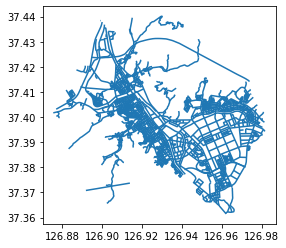

In [25]:
street.plot()

In [26]:
# 연속 지적도 (토지를 세분화하여 표시한 지도)

# PNU 필지고유번호
# JIBUN 지번

c_chart

,PNU,JIBUN,geometry
0,4117310400107080003,708-3답,"MULTIPOLYGON (((126.95443 37.36714, 126.95449 ..."
1,4117310400107080004,708-4대,"MULTIPOLYGON (((126.95418 37.36731, 126.95419 ..."
2,4117310400107080005,708-5대,"MULTIPOLYGON (((126.95405 37.36724, 126.95410 ..."
3,4117310400107090001,709-1대,"MULTIPOLYGON (((126.95386 37.36702, 126.95393 ..."
4,4117310400107090003,709-3대,"MULTIPOLYGON (((126.95446 37.36696, 126.95448 ..."
...,...,...,...
39937,4117310200117260004,1726-4 도,"MULTIPOLYGON (((126.97209 37.40510, 126.97209 ..."
39938,4117110100111500006,1150-6 임,"MULTIPOLYGON (((126.90563 37.37077, 126.90556 ..."
39939,4117310400109160008,916-8대,"MULTIPOLYGON (((126.94888 37.38778, 126.94898 ..."
39940,4117110300108410051,841-51 구,"MULTIPOLYGON (((126.90857 37.40393, 126.90857 ..."


In [27]:
c_chart.drop('geometry', axis=1).describe(include='all')

,PNU,JIBUN
count,39942,39942
unique,39942,37406
top,4117110100109360001,41-2대
freq,1,4


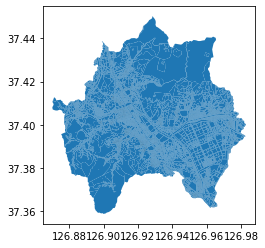

In [28]:
c_chart.plot()

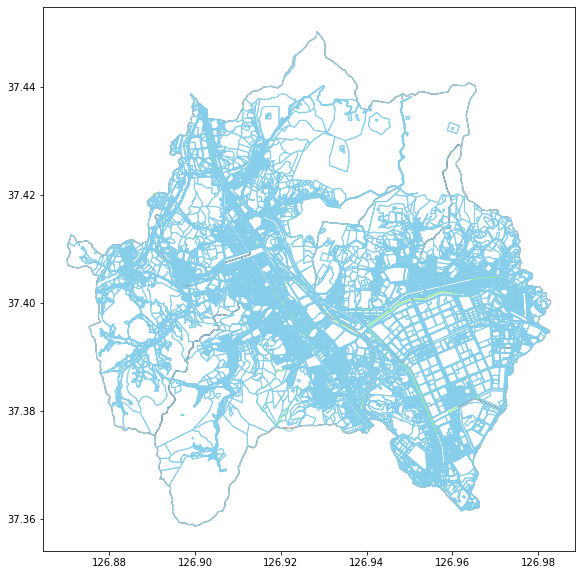

In [35]:
# 위의 5개의 데이터를 한꺼번에 표현

# 가장 큰 지도인 법정경계(시군구)를 바탕으로 설정
ax = s_boundary_c.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# 다른 지도들을 위에 표현
ad_boundary.plot(color='none', edgecolor = 'lightgreen', ax=ax)
s_boundary_t.plot(color='none', edgecolor = 'maroon', ax=ax)
street.plot(color='none',edgecolor = 'orange', ax=ax)
c_chart.plot(color='none',edgecolor = 'skyblue', ax=ax, zorder= 4)

### 인구 분포

In [ ]:
# 인구 분포
whole = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/whole_population.geojson')
old = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/old_population.geojson')
mid = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/mid_population.geojson')
youth = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/youth_population.geojson')

### 교통 수단 분포

In [ ]:
busstop_l = pd.read_csv('C:/Users/jlee0/Desktop/KYU/project/compas/data/13.안양시_버스정류장_위치정보.csv')
busstop_u = pd.read_csv('C:/Users/jlee0/Desktop/KYU/project/compas/data/14.안양시_버스정류장별_이용객수.csv')
subway_l = pd.read_csv('C:/Users/jlee0/Desktop/KYU/project/compas/data/15.안양시_지하철역_위치정보.csv')

### 공간시설 분포

In [ ]:
# 도시계획
cityplan_EBF = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/cityplan(Environmental Basic Facilities).geojson')
cityplan_HSF = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/cityplan(Health and Sanitation Facility).geojson')
cityplan_PCSF = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/cityplan(Public Culture and Sports Facilities).geojson')
cityplan_SF = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/cityplan(Space facility).geojson')
cityplan_TF = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/cityplan(Transportation Facility).geojson')

### 유동인구가 많은 건물 분포

In [ ]:
school = pd.read_csv('C:/Users/jlee0/Desktop/KYU/project/compas/data/06.안양시_학교현황.csv')
kindergarten = pd.read_csv('C:/Users/jlee0/Desktop/KYU/project/compas/data/07.안양시_유치원현황.csv')
public_health_c = pd.read_csv('C:/Users/jlee0/Desktop/KYU/project/compas/data/08.안양시_복지회관_보건소현황.csv')
hospital = pd.read_csv('C:/Users/jlee0/Desktop/KYU/project/compas/data/09.안양시_병원정보.csv')

### 공장 분포

In [ ]:
factory_g = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/factory_grid.geojson')
factory = pd.read_csv('C:/Users/jlee0/Desktop/KYU/project/compas/data/10.안양시_공장등록현황.csv')
factory_sd = pd.read_csv('C:/Users/jlee0/Desktop/KYU/project/compas/data/12.안양시_비산먼지발생신고_사업장.csv')

### 건물 분포

In [ ]:
building_w_g = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/building_width_grid.geojson')
builindg = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/streetname_building.geojson')

### 기타

In [ ]:
link_info = gpd.read_file('C:/Users/jlee0/Desktop/KYU/project/compas/data/link_info.geojson')
node_info = pd.read_csv('C:/Users/jlee0/Desktop/KYU/project/compas/data/16.안양시_노드정보.csv')